# scipyを用いてvariogram, krigingを実装する

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy import stats
import matplotlib.pyplot as plt

## scipyを用いた距離行列の作成・バリオグラムのプロット

In [2]:
n = 3
data = np.array([[np.random.normal(0, 10) for i in range(n)] for i in range(100)]) #x,y,zを生成

In [3]:
print(data)

[[ -8.95508456 -21.03336065  -1.55568158]
 [ 26.99402319   2.98847671   2.78537252]
 [ 16.32058691   8.84433312   5.76055033]
 [ 11.44519355  -7.71066809   4.32024819]
 [ -0.204099    -7.90206208   4.61955458]
 [  4.43270759   9.28333599   7.78118697]
 [ -9.04783112 -12.49059926  -9.17797568]
 [  5.66848798   3.49757151  -7.98915938]
 [  7.84543824  -6.47832288  -6.97559889]
 [ -4.42552544  13.52912738  -2.95833402]
 [ 12.47653105 -13.42976279  -7.32910701]
 [ -7.73216869   9.99512916 -14.2658261 ]
 [  1.8713774  -14.60705692  -3.1868445 ]
 [  5.40527008 -11.06911629 -12.27621609]
 [ -7.74789048   3.42140936   8.36117991]
 [  9.00922439   4.05851116   0.79393396]
 [-17.97993882 -17.42681051  19.26755862]
 [ -0.2514351    4.22869117  10.77086764]
 [  3.85471455 -15.91037069 -13.16210763]
 [  0.34457329 -11.01137748 -11.45996345]
 [ 18.72231297   6.47744778   9.56587199]
 [ -3.69396625  25.40792243   3.66735014]
 [ -8.14376627  14.59183619 -10.27400403]
 [  2.20802954   2.74095641  -3.21

In [4]:
data[:,0:2]

array([[ -8.95508456, -21.03336065],
       [ 26.99402319,   2.98847671],
       [ 16.32058691,   8.84433312],
       [ 11.44519355,  -7.71066809],
       [ -0.204099  ,  -7.90206208],
       [  4.43270759,   9.28333599],
       [ -9.04783112, -12.49059926],
       [  5.66848798,   3.49757151],
       [  7.84543824,  -6.47832288],
       [ -4.42552544,  13.52912738],
       [ 12.47653105, -13.42976279],
       [ -7.73216869,   9.99512916],
       [  1.8713774 , -14.60705692],
       [  5.40527008, -11.06911629],
       [ -7.74789048,   3.42140936],
       [  9.00922439,   4.05851116],
       [-17.97993882, -17.42681051],
       [ -0.2514351 ,   4.22869117],
       [  3.85471455, -15.91037069],
       [  0.34457329, -11.01137748],
       [ 18.72231297,   6.47744778],
       [ -3.69396625,  25.40792243],
       [ -8.14376627,  14.59183619],
       [  2.20802954,   2.74095641],
       [ -4.71839219, -26.95087551],
       [ 15.34582704,  -6.66935533],
       [  7.6114316 ,  11.52213786],
 

In [5]:
dist_vec=pdist(data[:,0:2], 'euclidean')

In [6]:
print(dist_vec)

[43.23640848 39.13484577 24.36525157 ... 12.94072346 32.01871782
 28.65637289]


In [7]:
dist_mat = squareform(dist_vec)

In [8]:
print(dist_mat)

[[ 0.         43.23640848 39.13484577 ... 21.50045957 25.84608606
  17.38096121]
 [43.23640848  0.         12.17428833 ... 44.50374449 32.79496176
  29.78897311]
 [39.13484577 12.17428833  0.         ... 35.10502627 22.48265772
  30.19191577]
 ...
 [21.50045957 44.50374449 35.10502627 ...  0.         12.94072346
  32.01871782]
 [25.84608606 32.79496176 22.48265772 ... 12.94072346  0.
  28.65637289]
 [17.38096121 29.78897311 30.19191577 ... 32.01871782 28.65637289
   0.        ]]


In [9]:
z_mat = squareform(pdist(data[:,2:], 'euclidean')**2/2)

In [10]:
[dist_mat, z_mat]

[array([[ 0.        , 43.23640848, 39.13484577, ..., 21.50045957,
         25.84608606, 17.38096121],
        [43.23640848,  0.        , 12.17428833, ..., 44.50374449,
         32.79496176, 29.78897311],
        [39.13484577, 12.17428833,  0.        , ..., 35.10502627,
         22.48265772, 30.19191577],
        ...,
        [21.50045957, 44.50374449, 35.10502627, ...,  0.        ,
         12.94072346, 32.01871782],
        [25.84608606, 32.79496176, 22.48265772, ..., 12.94072346,
          0.        , 28.65637289],
        [17.38096121, 29.78897311, 30.19191577, ..., 32.01871782,
         28.65637289,  0.        ]]),
 array([[  0.        ,   9.42237533,  26.76362463, ...,  19.96875797,
          29.30086991,   8.11096854],
        [  9.42237533,   0.        ,   4.42584149, ...,   1.95734884,
          71.95478411,  35.01757561],
        [ 26.76362463,   4.42584149,   0.        , ...,   0.49662403,
         112.07154708,  64.34178967],
        ...,
        [ 19.96875797,   1.95734884,

In [11]:
z_mat.shape

(100, 100)

In [12]:
z_vec = squareform(z_mat)

In [13]:
print(z_vec)

[ 9.42237533 26.76362463 17.26327531 ... 97.64739051 53.53289665
  6.57948959]


In [14]:
np.stack([dist_vec, z_vec])

array([[43.23640848, 39.13484577, 24.36525157, ..., 12.94072346,
        32.01871782, 28.65637289],
       [ 9.42237533, 26.76362463, 17.26327531, ..., 97.64739051,
        53.53289665,  6.57948959]])

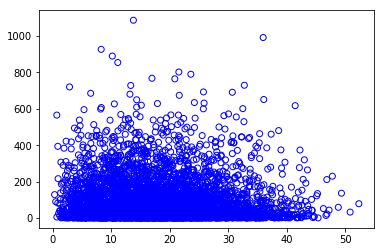

In [15]:
plt.scatter(dist_vec, pdist(data[:,2:], 'euclidean')**2/2, facecolors = 'None', edgecolors='blue')

In [16]:
def get_diff(data):
    '''
    get the difference of spatial data
    input: (n,3) matrix data
    output: np.array(n,2)
    '''
    dist_vec = pdist(data[:, :2])
    z_vec = pdist(data[:, 2:])**2/2
    diff = np.stack([dist_vec, z_vec])
    
    return diff

In [17]:
vario = get_diff(data)

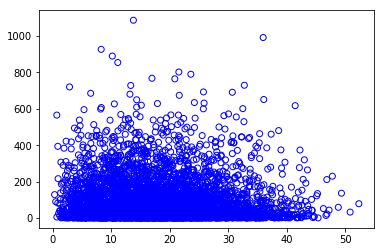

In [18]:
plt.scatter(vario[0], vario[1],  facecolors = 'None', edgecolors='blue')

In [19]:
def variogram(xyv_array):
    xy_dist = squareform(pdist(xyv_array[:, 0:2], 'euclidean'))
    s_vario = squareform(pdist(xyv_array[:, 2:3], 'euclidean')**2 / 2)
    return [xy_dist, s_vario]

In [20]:
data = np.array([[np.random.normal(0, 10) for i in range(n)] for i in range(5000)])

In [21]:
%timeit variogram(data)

12.5 ms ± 435 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%timeit get_diff(data)

6.85 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
print(vario[0].flatten())

[43.23640848 39.13484577 24.36525157 ... 12.94072346 32.01871782
 28.65637289]


In [58]:
np.max(vario[0])

52.368818680335515

In [42]:
vario.shape

(2, 4950)

In [61]:
def emp_variogram(z_vario, lag_h):
    '''
    calculate empirical variogram
    input: difference of spatial (2, nC2)matrix,  bandwith of bins
    '''
    num_rank = int(np.max(z_vario[0]) / lag_h)
    bin_means, bin_edges, bin_number = stats.binned_statistic(z_vario[0], z_vario[1], statistic='mean', bins=num_rank)
    e_vario = np.stack([bin_edges[1:], bin_means[0:]], axis=0) #bin_edgesに関しては最初のものを省く
    e_vario = np.delete(e_vario, np.where(e_vario[1] <= 0), axis=1)
    
    return e_vario

In [52]:
print(emp_variogram(vario, 10))

[90.9112922  89.08501078 88.12167729 86.91670851 87.24549145]
[ 0.2880758  10.70422437 21.12037295 31.53652153 41.9526701  52.36881868]
[[10.70422437 21.12037295 31.53652153 41.9526701  52.36881868]
 [90.9112922  89.08501078 88.12167729 86.91670851 87.24549145]]


In [28]:
e_vario = emp_variogram(vario,10)

In [53]:
e_vario[1]

array([90.9112922 , 89.08501078, 88.12167729, 86.91670851, 87.24549145])

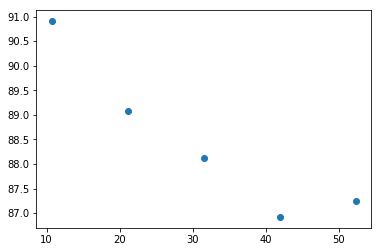

In [59]:
plt.scatter(e_vario[0], e_vario[1])

In [63]:
def liner_model(x, a, b):
    return a + b * x
def gaussian_model(x, a, b, c):
    return a + b * (1 - np.exp(-(x / c)**2))
def exponential_model(x, a, b, c):
    return a + b * (1 - np.exp(-(x / c)))
def spherical_model(x, a, b, c):
    cond = [x < c, x > c]
    func = [lambda x : a + (b / 2)  * (3 * (x / c) - (x / c)**3), lambda x : a + b]
    return np.piecewise(x, cond, func)

In [76]:
import scipy.optimize as opt
def auto_fit(e_vario, fitting_range, selected_model):
    # フィッティングレンジまでで標本バリオグラムを削る
    data = np.delete(e_vario, np.where(e_vario[0]>fitting_range)[0], axis=1)
    if (selected_model == 0):
        param, cov = opt.curve_fit(liner_model, data[0], data[1])
    elif (selected_model == 1):
        param, cov = opt.curve_fit(gaussian_model, data[0], data[1], [0, 0, fitting_range])
    elif (selected_model == 2):
        param, cov = opt.curve_fit(exponential_model, data[0], data[1], [0, 0, fitting_range])
    elif (selected_model == 3):
        param, cov = opt.curve_fit(spherical_model, data[0], data[1], [0, 0, fitting_range])
    param = np.insert(param, 0, [selected_model,fitting_range])
    return param

In [77]:
param  = auto_fit(e_vario, 120, 0)

In [78]:
print(param)

[ 0.00000000e+00  1.20000000e+02  9.13322807e+01 -9.12036115e-02]


91.3322807009933 -0.0912036114836168


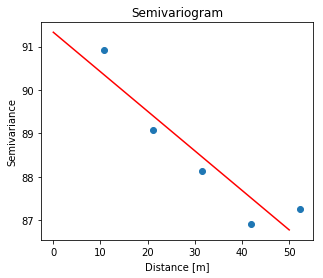

In [80]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(e_vario[0], e_vario[1], 'o')
xlim_arr = np.arange(0, np.max(e_vario[0]), 10)
if (param[0] == 0):
    ax.plot(xlim_arr, liner_model(xlim_arr, param[2], param[3]), 'r-')
    print(param[2], param[3])
elif (param[0] == 1):
    ax.plot(xlim_arr, gaussian_model(xlim_arr, param[2], param[3], param[4]), 'r-')
    print(xlim_arr, param[3], param[4])
elif (param[0] == 2):
    ax.plot(xlim_arr, exponential_model(xlim_arr, param[2], param[3], param[4]), 'r-')
    print(param[2], param[3], param[4])
elif (param[0] == 3):
    ax.plot(xlim_arr, spherical_model(xlim_arr, param[2], param[3], param[4]), 'r-')
    print(param[2], param[3], param[4])
# グラフのタイトルの設定
ax.set_title('Semivariogram')
# 軸ラベルの設定
#ax.set_xlim([0, np.max(e_vario[0])])
#ax.set_ylim([0, np.max(e_vario[1])])
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Semivariance')
# グラフの縦横比を調整
aspect = 0.8 * (ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])                     
ax.set_aspect(aspect)
# グラフの描画
plt.show()